# Exercícios

### Para todos os desafios, insira legendas, rótulos dos eixos, título do gráfico.

### Resolva os 3 primeiros exercícios usando matplotlib e os 3 seguintes usando altair. O último, fica à seu critério

## 1) Utilizando o dataset Pokemon, crie uma função que receba o dataset e o atributo e retorne um histograma que mostre a distribuição do valor dos atributos “attack”, “defense”,”Sp.Atk”, “Sp.Def” e “Speed”. Insira uma linha indicando o valor médio do atributo

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from vega_datasets import data
import altair as alt

plt.style.use('seaborn')
# for the notebook only (not for JupyterLab) run this command once per session
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
df = pd.read_csv('Pokemon.csv')   
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


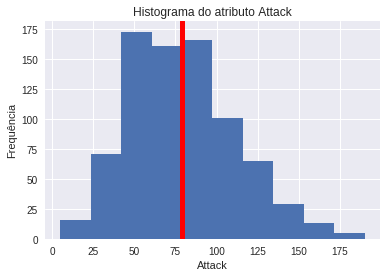

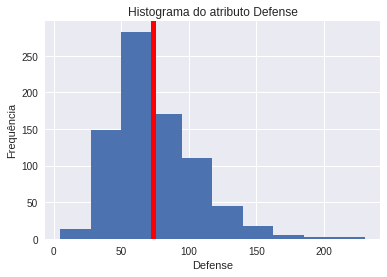

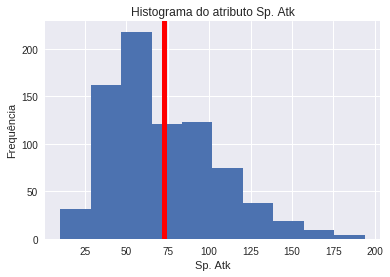

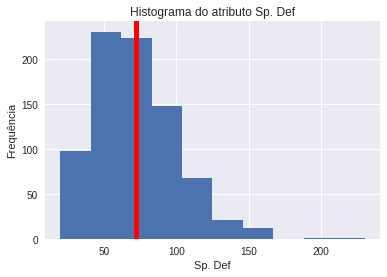

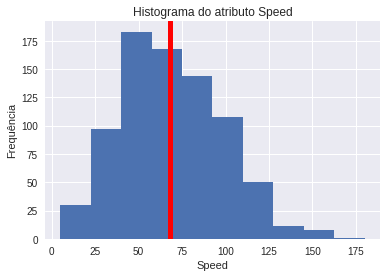

In [4]:
# resposta 1


def plot_hist(df, attribute):
    plt.hist(df[attribute])
    plt.axvline(df[attribute].mean(), color='r', linewidth=5)
    plt.xlabel(f'{attribute}')
    plt.ylabel('Frequência')
    plt.title(f'Histograma do atributo {attribute}')
    plt.show()

    
plot_hist(df, 'Attack')
plot_hist(df, 'Defense')
plot_hist(df, 'Sp. Atk')
plot_hist(df, 'Sp. Def')
plot_hist(df, 'Speed')
    



## 2) Usando o dataset Pokemon, crie um scatter plot comparando ataque (eixo x) e defesa (eixo y) de pokemons dos tipos Fire e Water. 

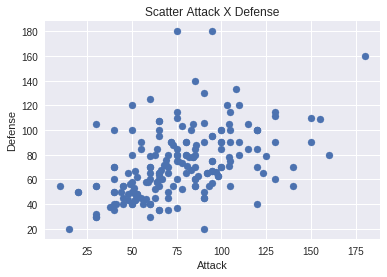

In [5]:
# resposta 2
filtering = (df['Type 1'] == 'Fire') | (df['Type 1'] == 'Water') | (df['Type 2'] == 'Fire') | (df['Type 2'] == 'Water')
df_fire_water = df[filtering]

plt.scatter(df_fire_water['Attack'], df_fire_water['Defense'])
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title(f'Scatter Attack X Defense')
plt.show()

## 3) Usando o dataset Pokemons, crie um gráfico de linha para comparar a quantidade de pokemons de cada tipo ao longo das gerações

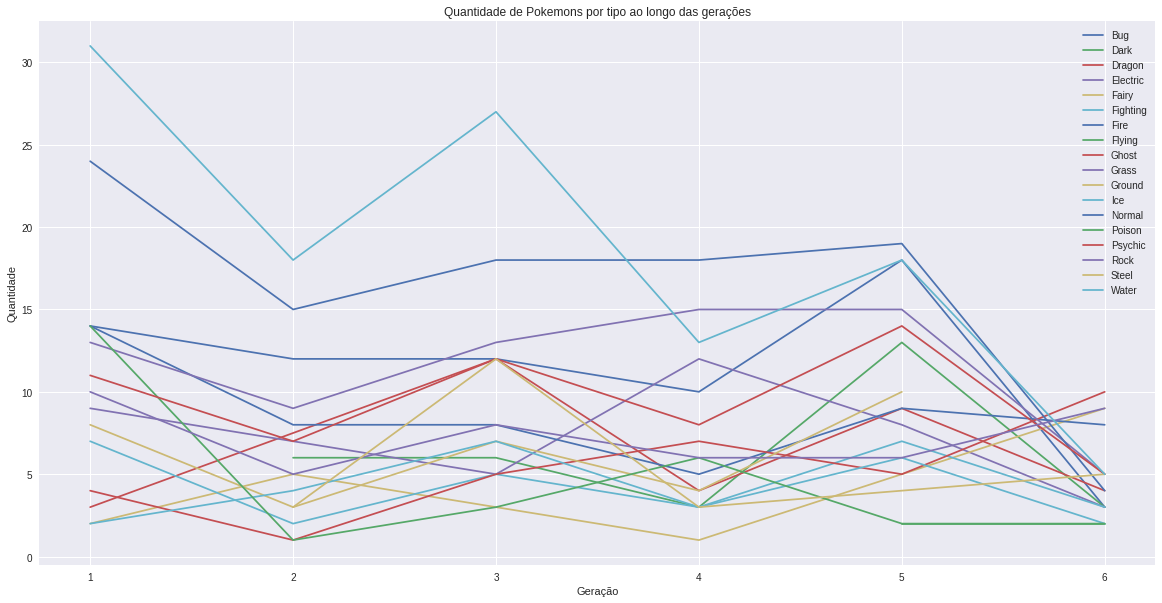

In [6]:
# resposta 3
df_grouped = df.groupby(['Generation', 'Type 1'], as_index=False).count()

types = df_grouped['Type 1'].unique()
types.sort(axis=0)

plt.figure(figsize=(20,10))  

for tp in types:
    df_filtered = df_grouped[df_grouped['Type 1'] == tp]  
    plt.plot(df_filtered['Generation'], df_filtered['#'], label=tp)

plt.xlabel('Geração')
plt.ylabel('Quantidade')
plt.title(f'Quantidade de Pokemons por tipo ao longo das gerações')

plt.legend()

## 4) Utilizando o dataset airports (var = data.airports()):
    -> Faça um rank bar dos 5 primeiros estados dos EUA com maior número de aeroportos


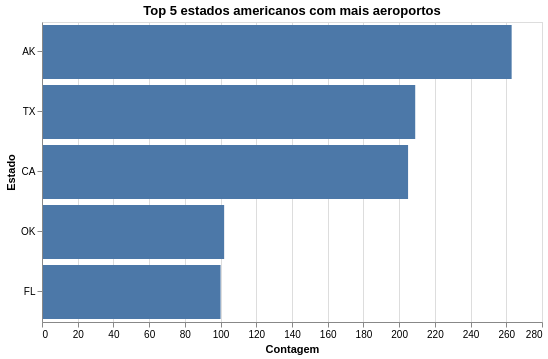

In [7]:
# resposta 4
df_airports = data.airports()
df_airports.head()
df_us_airports = df_airports[df_airports['country'] == 'USA']
df_us_airports = df_us_airports[['state']]
df_us_airports_grouped = df_us_airports.groupby(['state']).size()
top5_by_state = df_us_airports_grouped.sort_values(ascending=False)[:5]
top5_by_state = top5_by_state.to_frame()
top5_by_state['state'] = top5_by_state.index
top5_by_state.columns = ['count', 'state']


chart = alt.Chart(top5_by_state).mark_bar().properties(title='Top 5 estados americanos com mais aeroportos', width=500, height=300).encode(
    alt.X('count', axis=alt.Axis(title='Contagem')),
    alt.Y('state', axis=alt.Axis(title='Estado'), sort=alt.SortField(field='count', order='descending'))
)

chart

## 5) Utilizando o conjunto de dados íris (var = data.íris()):
    -> Crie dois gráficos scatter, chart1 e chart2. Para o chart1, x=petalLenght, y=petalWidth. Para o chart2, x = sepalLenght, y=sepalWidth.

    -> Componha esses gráficos numa única apresentação. Para isso, faça chart1 | chart2


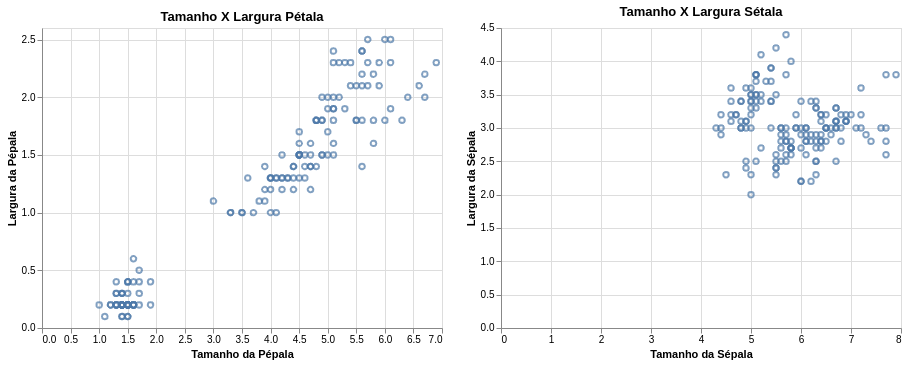

In [8]:
# resposta 5
from vega_datasets import data
df_iris = data.iris()
df_iris
chart1 = alt.Chart(df_iris).mark_point().properties(title='Tamanho X Largura Pétala').encode(  
    alt.X('petalLength', axis=alt.Axis(title='Tamanho da Pépala')),
    alt.Y('petalWidth', axis=alt.Axis(title='Largura da Pépala'))
)

chart1

chart2 = alt.Chart(df_iris).mark_point().properties(title='Tamanho X Largura Sétala').encode(
    alt.X('sepalLength', axis=alt.Axis(title='Tamanho da Sépala')),
    alt.Y('sepalWidth', axis=alt.Axis(title='Largura da Sépala'))
)

chart1 | chart2


## 6) Usando o dataset Pokemon, crie um rank bar que mostre o rank para Type 1

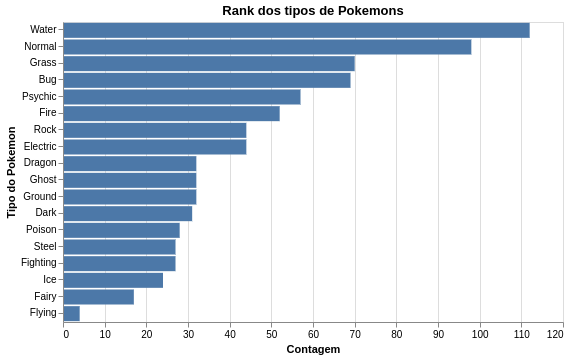

In [9]:
# resposta 6
chart = alt.Chart(df).mark_bar().properties(title='Rank dos tipos de Pokemons', width=500, height=300).encode(
    alt.X('count():Q', axis=alt.Axis(title='Contagem')),
    alt.Y('Type 1:O', axis=alt.Axis(title='Tipo do Pokemon'), sort=alt.EncodingSortField(op="count", order='descending'))
)
chart

## 7) Utilizando o dataset Pokemon, crie um gráfico de barras que mostre, para cada geração, a proporção de pokemons Legendários e aqueles que não são legendários. Use stacked bar. 

/home/marcelo/Documentos/Ambiente/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/marcelo/Documentos/Ambiente/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


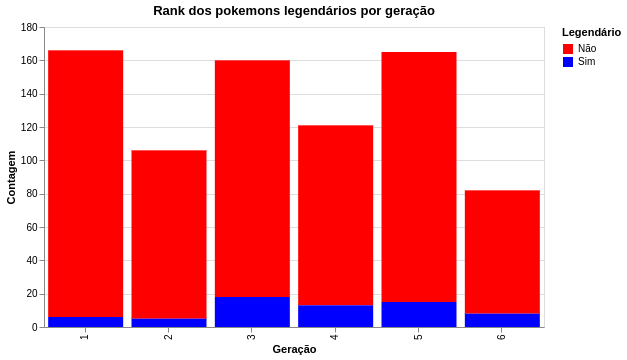

In [10]:
# resposta 7
sub_df = df[['Legendary', 'Generation']]
sub_df['Legendario'] = 'Não'
sub_df.loc[sub_df['Legendary'], 'Legendario'] = 'Sim'

chart = alt.Chart(sub_df).mark_bar().properties(title='Rank dos pokemons legendários por geração', width=500, height=300).encode(
    alt.X('Generation:O', axis=alt.Axis(title='Geração')),
    alt.Y('sum_acc:Q', axis=alt.Axis(title='Contagem')),
    color=alt.Color('Legendario', scale=alt.Scale(range=['#FF0000', '#0000FF']), legend=alt.Legend(title="Legendário"))
).transform_aggregate(
    sum_acc='count()',
    groupby=["Generation", "Legendario"]
)

chart
